In [911]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("classic")

star_wars = pd.read_csv(r"C:\Users\Damius\Desktop\star-wars-survey\StarWars.csv", encoding="Latin-1")
star_wars.shape

(1187, 38)

In [912]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [913]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [914]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [915]:
star_wars = star_wars.rename(columns = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
          "Unnamed: 4": "seen_2",
          "Unnamed: 5": "seen_3", 
          "Unnamed: 6": "seen_4", 
          "Unnamed: 7": "seen_5",
          "Unnamed: 8": "seen_6"
         })


movie_mapping = {"Star Wars: Episode I  The Phantom Menace": True,
           np.nan: False,
           "Star Wars: Episode II  Attack of the Clones": True,
           "Star Wars: Episode III  Revenge of the Sith": True,
           "Star Wars: Episode IV  A New Hope": True,
           "Star Wars: Episode V The Empire Strikes Back": True,
           "Star Wars: Episode VI Return of the Jedi": True
}

for v in star_wars.columns[3:9]:
    star_wars[v] = star_wars[v].map(movie_mapping)
      
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [916]:
star_wars = star_wars.rename(columns = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
          "Unnamed: 10":"ranking_2",
          "Unnamed: 11":"ranking_3",
          "Unnamed: 12":"ranking_4",
          "Unnamed: 13":"ranking_5",
          "Unnamed: 14":"ranking_6"
         })

star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [917]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<BarContainer object of 6 artists>

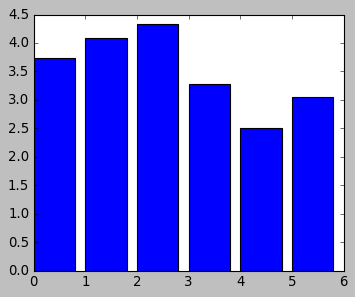

In [918]:
fig = plt.figure(figsize = (5,4))
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

In [919]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

The chart tells us that the original films are rated a lot higher than the newer films. The last three bar ratings represent the first movies and the first three bar ratings represent the newer current prequal films.

<BarContainer object of 6 artists>

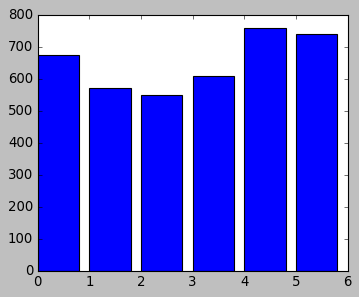

In [920]:
fig = plt.figure(figsize = (5,4))
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

This chart confirms that the original films are much more popular (referenced in the first chart) because more people have seen them.

In [921]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

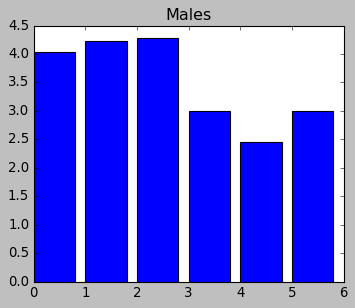

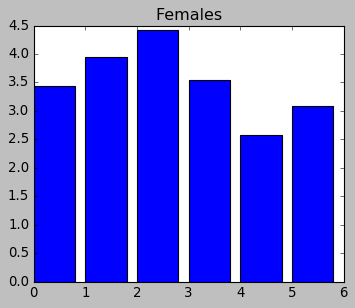

In [922]:
fig = plt.figure(figsize=(5,4))
#Ranked movies by males
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.title("Males")
plt.show()


fig = plt.figure(figsize=(5,4))
#Ranked movies by females
plt.bar(range(6), females[females.columns[9:15]].mean())
plt.title("Females")
plt.show()

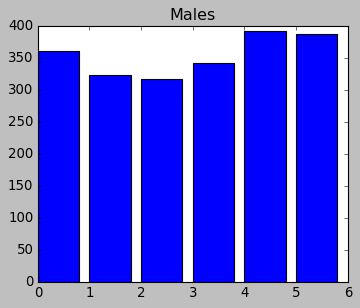

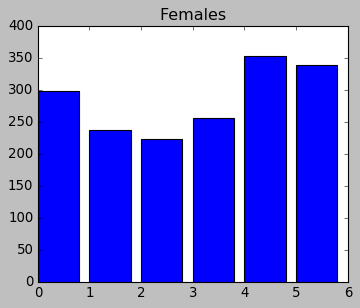

In [923]:
fig = plt.figure(figsize=(5,4))
#View count by males
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.title("Males")
plt.show()


fig = plt.figure(figsize=(5,4))
#View count by females
plt.bar(range(6), females[females.columns[3:9]].sum())
plt.title("Females")
plt.show()

This info shows us that more males have seen the Star Wars movies than females. 

In [924]:
star_wars[star_wars.columns[15:29]].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [925]:
star_wars.columns[15:29].value_counts()

Unnamed: 25                                                                                                       1
Unnamed: 27                                                                                                       1
Unnamed: 28                                                                                                       1
Unnamed: 17                                                                                                       1
Unnamed: 26                                                                                                       1
Unnamed: 18                                                                                                       1
Unnamed: 21                                                                                                       1
Unnamed: 16                                                                                                       1
Unnamed: 22                                                             

In [926]:
star_wars["Unnamed: 17"].value_counts(dropna=False)

Very favorably                                 547
NaN                                            355
Somewhat favorably                             210
Neither favorably nor unfavorably (neutral)     48
Somewhat unfavorably                            12
Unfamiliar (N/A)                                 8
Very unfavorably                                 6
Name: Unnamed: 17, dtype: int64

In [927]:
star_wars = star_wars.rename(columns = {"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
                                        "Unnamed: 16": "Luke Skywalker",
                                        "Unnamed: 17": "Princess Leia Organa",
                                        "Unnamed: 18": "Anakin Skywalker",
                                        "Unnamed: 19": "Obi Wan Kenobi",
                                        "Unnamed: 20": "Emperor Palpatine",
                                        "Unnamed: 21": "Darth Vader",
                                        "Unnamed: 22": "Lando Calrissian",
                                        "Unnamed: 23": "Boba Fett",
                                        "Unnamed: 24": "C-3P0",
                                        "Unnamed: 25": "R2 D2",
                                        "Unnamed: 26": "Jar Jar Binks",
                                        "Unnamed: 27": "Padme Amidala",
                                        "Unnamed: 28": "Yoda"})


#star_wars[star_wars.columns[15:29]]

most_favorable = {"Very favorably": 1,
                   np.nan: 4,
                  "Somewhat favorably": 2,
                  "Neither favorably nor unfavorably (neutral)": 3,
                  "Unfamiliar (N/A)": 4,
                  "Somewhat unfavorably": 5,
                  "Very unfavorably": 6
                 }

for v in star_wars.columns[15:29]:
    star_wars[v] = star_wars[v].map(most_favorable)

<BarContainer object of 14 artists>

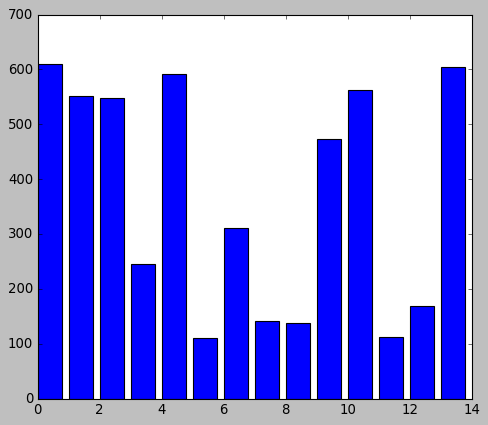

In [928]:
    
fav_list = ["Han Solo", 
            "Luke Skywalker", 
            "Princess Leia Organa", 
            "Anakin Skywalker", 
            "Obi Wan Kenobi", 
            "Emperor Palpatine", 
            "Darth Vader", 
            "Lando Calrissian", 
            "Boba Fett", 
            "C-3P0", 
            "R2 D2", 
            "Jar Jar Binks", 
            "Padme Amidala",
            "Yoda"]


favorite_character = star_wars[star_wars[fav_list] == 1]
        
fig = plt.figure(figsize = (7,6))
plt.bar(range (14), favorite_character[favorite_character.columns[15:29]].sum())

The characters in the data were previously marked as Unnamed. After cleaning the data I was able to find out who fans felt like the most popular character was. It seems to be a tie between Han Solo and Yoda.

The least popular character appears to be Jar Jar Binks.

Fans seem to be split between Han Solo and Yoda as most liked. Also, there's a split between Luke Skywalker and Princess Leia Organa. Emperor Palpatine and Jar Jar Binks are split for the most hated character. 

In [929]:
star_wars["Luke Skywalker"].value_counts(dropna=False)
#star_wars[star_wars[fav_list] == 1].sum()

1    552
4    361
2    219
3     38
5     13
6      3
Name: Luke Skywalker, dtype: int64